In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import glob
import tensorflow as tf

In [18]:
data_path = '../data/Forest Segmented/Forest Segmented/meta_data.csv'
data = pd.read_csv(data_path)
data

,image,mask
0,10452_sat_08.jpg,10452_mask_08.jpg
1,10452_sat_18.jpg,10452_mask_18.jpg
2,111335_sat_00.jpg,111335_mask_00.jpg
3,111335_sat_01.jpg,111335_mask_01.jpg
4,111335_sat_02.jpg,111335_mask_02.jpg
...,...,...
5103,998002_sat_31.jpg,998002_mask_31.jpg
5104,998002_sat_32.jpg,998002_mask_32.jpg
5105,998002_sat_40.jpg,998002_mask_40.jpg
5106,998002_sat_41.jpg,998002_mask_41.jpg


In [19]:
img_path = '../data/Forest Segmented/Forest Segmented/images'
masks_path = '../data/Forest Segmented/Forest Segmented/masks'

In [ ]:
# Load and order filenames
image_filepath = sorted([os.path.join(img_path, f) for f in os.listdir(img_path) if f.endswith('.jpg')])
mask_filepath = sorted([os.path.join(masks_path, f) for f in os.listdir(masks_path) if f.endswith('.jpg')])

In [21]:
#function to normalize the RGB in image or mask

def image_preprocessing(image_filepath):
    image = Image.open(image_filepath) #create an image
    image = np.asarray(image) #transforms it to an array shape (256,256,3)
    image = image/255 #normalize it between 0 and 1
    return image

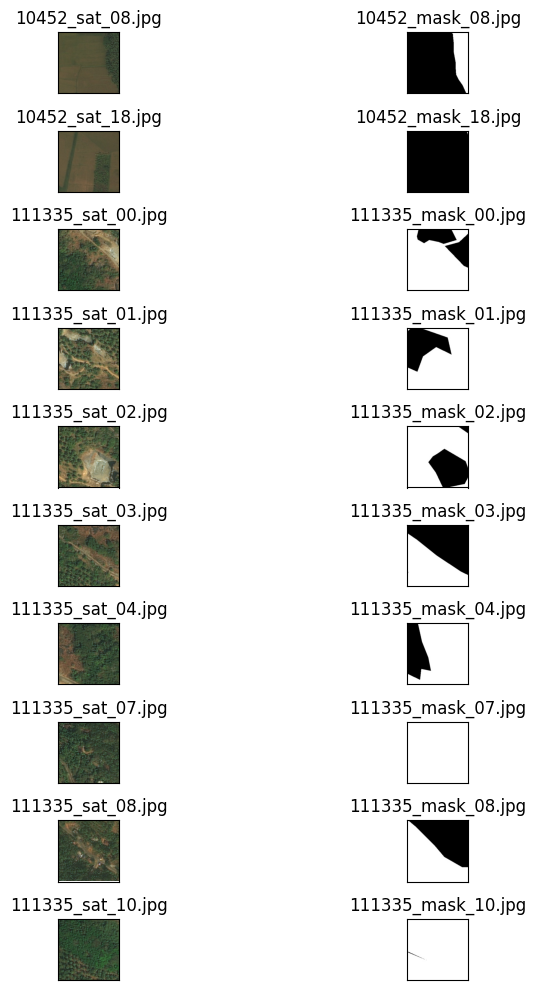

In [22]:
fig = plt.figure(figsize=(10, 10))

for i in range(10):
    # Display image
    image_filename = data.iloc[i]['image']
    mask_filename = data.iloc[i]['mask']

    plt.subplot(10, 2, 2*i + 1)
    img = image_preprocessing(f'{img_path}/{image_filename}')
    plt.imshow(img)
    plt.title(image_filename)
    plt.xticks(())
    plt.yticks(())

    # Display corresponding mask
    plt.subplot(10, 2, 2*i + 2)
    mask = image_preprocessing(f'{masks_path}/{mask_filename}')
    plt.imshow(mask, cmap='gray')
    plt.title(mask_filename)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()


In [ ]:
# Compute the % of forest on a mask (number of white pixels on total number of pixels)
def compute_percentage_forest(mask_filepath, data):
    percentages = []

    for i in range(0,5108):
        mask = image_preprocessing(mask_filepath[i])
        count_forest = np.count_nonzero(mask==1) #count number of values of pixels = 1 ie white pixels ie forest
        count_non_forest = np.count_nonzero(mask==0) #count number of values of pixels = 0 ie black pixels ie non_forest
        percentage_forest = count_forest/(count_forest+count_non_forest)*100 #compute the percentage of forest
        percentages.append(percentage_forest)

    data['percentage_forest'] = percentages
    return data

In [26]:
compute_percentage_forest(mask_filepath,data)

,image,mask,percentage_forest
0,10452_sat_08.jpg,10452_mask_08.jpg,20.031436
1,10452_sat_18.jpg,10452_mask_18.jpg,0.186427
2,111335_sat_00.jpg,111335_mask_00.jpg,77.119694
3,111335_sat_01.jpg,111335_mask_01.jpg,72.073993
4,111335_sat_02.jpg,111335_mask_02.jpg,72.520376
...,...,...,...
5103,998002_sat_31.jpg,998002_mask_31.jpg,88.673633
5104,998002_sat_32.jpg,998002_mask_32.jpg,1.953634
5105,998002_sat_40.jpg,998002_mask_40.jpg,85.614154
5106,998002_sat_41.jpg,998002_mask_41.jpg,21.172991
